In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#importing the data
df = pd.read_csv('gender_classification.csv')

In [61]:
print(df.head())

   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  


In [63]:
#encoding the column gender
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])

In [65]:
#dropping original gender and keeping numerical columns
X = df.drop(['gender', 'gender_encoded'], axis=1)
y = df['gender_encoded']

In [67]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#training model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
#predicting
y_pred = model.predict(X_test)

In [73]:
#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.951048951048951
Classification report:
               precision    recall  f1-score   support

      Female       0.95      0.95      0.95       502
        Male       0.95      0.95      0.95       499

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



In [75]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n", cm)

confusion matrix:
 [[479  23]
 [ 26 473]]


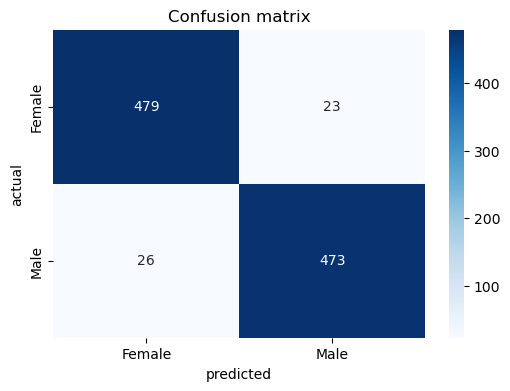

In [77]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix')
plt.show()

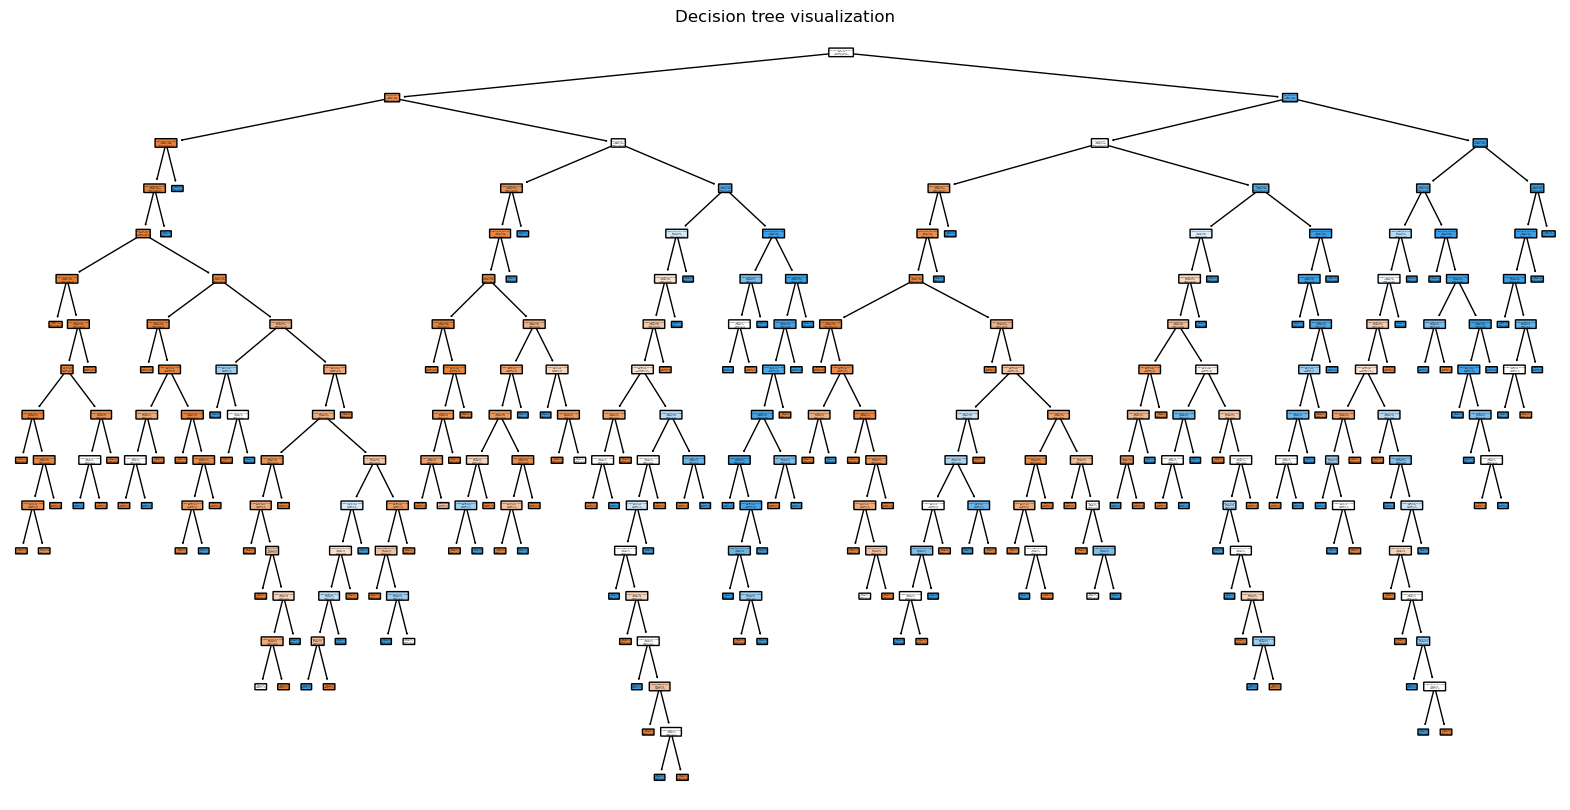

In [79]:
#decision tree plot
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision tree visualization")
plt.show()